In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [217]:
data = pd.read_csv('abalone.data',header=None, nrows = 1000)
data.columns = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']


In [218]:
data = data.sort_values(by='length')
data

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
236,I,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
238,I,0.110,0.090,0.030,0.0080,0.0025,0.0020,0.0030,3
237,I,0.130,0.100,0.030,0.0130,0.0045,0.0030,0.0040,3
719,I,0.150,0.100,0.025,0.0150,0.0045,0.0040,0.0050,2
696,I,0.155,0.105,0.050,0.0175,0.0050,0.0035,0.0050,4
...,...,...,...,...,...,...,...,...,...
165,M,0.725,0.570,0.190,2.5500,1.0705,0.4830,0.7250,14
891,M,0.730,0.595,0.230,2.8255,1.1465,0.4190,0.8970,17
478,M,0.735,0.590,0.225,1.7560,0.6370,0.3405,0.5800,21
334,F,0.740,0.600,0.195,1.9740,0.5980,0.4085,0.7100,16


In [219]:
_X = np.array(data['length'])
_y = np.array(data['whole_weight'])

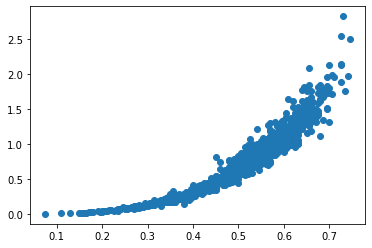

In [220]:
plt.scatter(_X, _y)

In [221]:
def min_max_scaler(array):
    """
    returns scaled array
    """
    return (array - np.min(array)) / (np.max(array) - np.min(array))


In [222]:
_scaled_X = min_max_scaler(_X)
_scaled_y = min_max_scaler(_y)


In [223]:
difference = np.abs(_scaled_X - _scaled_X[12])

In [224]:
len(difference)

1000

In [225]:
_range = [12]
window = 30
while len(_range) < window:
    _first = _range[0]
    _last = _range[-1]
    if _first == 0:
        _range.append(_last + 1)
    elif _last == len(difference) - 1:
        _range.insert(0, _first - 1)
    elif difference[_first - 1] < difference[_last + 1]:
        _range.insert(0, _first - 1)
    else:
        _range.append(_last + 1)

In [226]:
# _range

In [227]:
difference[_range]

array([0.06716418, 0.03731343, 0.02985075, 0.02985075, 0.02238806,
       0.02238806, 0.01492537, 0.01492537, 0.00746269, 0.        ,
       0.        , 0.        , 0.00746269, 0.02238806, 0.02985075,
       0.03731343, 0.03731343, 0.04477612, 0.04477612, 0.04477612,
       0.05223881, 0.05223881, 0.05970149, 0.06716418, 0.07462687,
       0.08208955, 0.08955224, 0.08955224, 0.08955224, 0.08955224])

In [141]:
def Gaussian(array):
    """
    """
    _constant = 1/(np.sqrt(2*np.pi))
    return _constant * np.exp((-array**2)/2)

In [142]:
def Triweight(array):
    """
    """
    _constant = 35/32
    return (1 - array**2)**3

In [143]:
def Biweight(array):
    """
    """
    _constant = 35/32
    return (1 - array**2)**2

In [144]:
Biweight(difference[_range])

array([0.9909983 , 0.99721735, 0.99821866, 0.99821866, 0.9989978 ,
       0.9989978 , 0.99955452, 0.99955452, 0.99988862, 1.        ,
       1.        , 1.        , 0.99988862, 0.9989978 , 0.99821866,
       0.99721735, 0.99721735, 0.99599422, 0.99599422, 0.99599422,
       0.99454966, 0.99454966, 0.99288417, 0.9909983 , 0.98889268,
       0.98656802, 0.98402511, 0.98402511, 0.98402511, 0.98402511])

In [145]:
Triweight(difference[_range])

array([0.98652788, 0.99582894, 0.99732918, 0.99732918, 0.99849708,
       0.99849708, 0.99933185, 0.99933185, 0.99983293, 1.        ,
       1.        , 1.        , 0.99983293, 0.99849708, 0.99732918,
       0.99582894, 0.99582894, 0.99399735, 0.99399735, 0.99399735,
       0.99183564, 0.99183564, 0.98934526, 0.98652788, 0.98338537,
       0.97991984, 0.97613362, 0.97613362, 0.97613362, 0.97613362])

In [152]:
_weight = Gaussian(difference[_range])

In [ ]:
def kernel(point, xmat, k):
    m, n = np.shape(xmat)
    weights = np.mat(np.eye((m)))
    
    for j in range(m):
        diff = point - X[j]
        weights[j, j] = np.exp(diff * diff.T / (-2.0 * k**2))
        
    return weights


def compute_yhat(X, y):
    """
    
    """
    _X = np.vstack([X.values, np.ones(len(X))]).T
    _y = y
    m, b = np.linalg.lstsq(_X, _y, rcond=None)[0]
    yhat = m * X + b
    
    return yhat

In [ ]:
y_hat = compute_yhat(_X[_range], _y[_range])

In [ ]:
y_hat = 

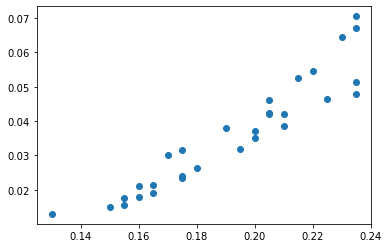

In [147]:
plt.scatter(_X[_range], _y[_range])

In [213]:
_X_mat = np.mat(_X[_range])
_y_mat = np.mat(_y[_range])

In [214]:
one = np.ones((1, 30), dtype = int)
one

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1]])

In [215]:
_stacked = np.hstack((one.T, _X_mat.T))
_stacked

matrix([[1.   , 0.13 ],
        [1.   , 0.15 ],
        [1.   , 0.155],
        [1.   , 0.155],
        [1.   , 0.16 ],
        [1.   , 0.16 ],
        [1.   , 0.165],
        [1.   , 0.165],
        [1.   , 0.17 ],
        [1.   , 0.175],
        [1.   , 0.175],
        [1.   , 0.175],
        [1.   , 0.18 ],
        [1.   , 0.19 ],
        [1.   , 0.195],
        [1.   , 0.2  ],
        [1.   , 0.2  ],
        [1.   , 0.205],
        [1.   , 0.205],
        [1.   , 0.205],
        [1.   , 0.21 ],
        [1.   , 0.21 ],
        [1.   , 0.215],
        [1.   , 0.22 ],
        [1.   , 0.225],
        [1.   , 0.23 ],
        [1.   , 0.235],
        [1.   , 0.235],
        [1.   , 0.235],
        [1.   , 0.235]])

In [151]:
_y_mat

matrix([[0.013 , 0.015 , 0.0175, 0.0155, 0.021 , 0.018 , 0.0215, 0.019 ,
         0.03  , 0.0235, 0.0315, 0.024 , 0.0265, 0.038 , 0.032 , 0.035 ,
         0.037 , 0.046 , 0.0425, 0.042 , 0.042 , 0.0385, 0.0525, 0.0545,
         0.0465, 0.0645, 0.0515, 0.0705, 0.048 , 0.067 ]])

In [160]:
_X_mat

matrix([[0.13 , 0.15 , 0.155, 0.155, 0.16 , 0.16 , 0.165, 0.165, 0.17 ,
         0.175, 0.175, 0.175, 0.18 , 0.19 , 0.195, 0.2  , 0.2  , 0.205,
         0.205, 0.205, 0.21 , 0.21 , 0.215, 0.22 , 0.225, 0.23 , 0.235,
         0.235, 0.235, 0.235]])

In [162]:
_X[_range]

array([0.13 , 0.15 , 0.155, 0.155, 0.16 , 0.16 , 0.165, 0.165, 0.17 ,
       0.175, 0.175, 0.175, 0.18 , 0.19 , 0.195, 0.2  , 0.2  , 0.205,
       0.205, 0.205, 0.21 , 0.21 , 0.215, 0.22 , 0.225, 0.23 , 0.235,
       0.235, 0.235, 0.235])

In [165]:
_y[_range] * _weight * _X[_range].T

array([0.00067269, 0.000897  , 0.00108165, 0.00095803, 0.00134011,
       0.00114867, 0.00141509, 0.00125054, 0.00203455, 0.00164065,
       0.00219917, 0.00167556, 0.0019029 , 0.00287964, 0.00248829,
       0.00279065, 0.00295012, 0.00375826, 0.0034723 , 0.00343145,
       0.00351387, 0.00322105, 0.00449504, 0.00477254, 0.00416233,
       0.0058984 , 0.00480888, 0.00658303, 0.00448206, 0.00625621])

In [167]:
np.dot(np.dot(_y[_range], _weight), _X[_range].T)

array([0.05612063, 0.06475458, 0.06691306, 0.06691306, 0.06907155,
       0.06907155, 0.07123004, 0.07123004, 0.07338852, 0.07554701,
       0.07554701, 0.07554701, 0.07770549, 0.08202247, 0.08418095,
       0.08633944, 0.08633944, 0.08849792, 0.08849792, 0.08849792,
       0.09065641, 0.09065641, 0.09281489, 0.09497338, 0.09713187,
       0.09929035, 0.10144884, 0.10144884, 0.10144884, 0.10144884])

In [170]:
np.dot(np.dot(_X[_range], _weight),_X[_range].T)

array([0.29855667, 0.34448846, 0.35597141, 0.35597141, 0.36745436,
       0.36745436, 0.37893731, 0.37893731, 0.39042026, 0.40190321,
       0.40190321, 0.40190321, 0.41338616, 0.43635205, 0.447835  ,
       0.45931795, 0.45931795, 0.4708009 , 0.4708009 , 0.4708009 ,
       0.48228385, 0.48228385, 0.4937668 , 0.50524975, 0.51673269,
       0.52821564, 0.53969859, 0.53969859, 0.53969859, 0.53969859])

In [173]:
np.dot(_y[_range], _weight) * _X_mat

matrix([[0.05612063, 0.06475458, 0.06691306, 0.06691306, 0.06907155,
         0.06907155, 0.07123004, 0.07123004, 0.07338852, 0.07554701,
         0.07554701, 0.07554701, 0.07770549, 0.08202247, 0.08418095,
         0.08633944, 0.08633944, 0.08849792, 0.08849792, 0.08849792,
         0.09065641, 0.09065641, 0.09281489, 0.09497338, 0.09713187,
         0.09929035, 0.10144884, 0.10144884, 0.10144884, 0.10144884]])

In [186]:
(np.dot(_X[_range], _weight) * _X_mat).I

matrix([[0.04992892],
        [0.0576103 ],
        [0.05953064],
        [0.05953064],
        [0.06145098],
        [0.06145098],
        [0.06337133],
        [0.06337133],
        [0.06529167],
        [0.06721201],
        [0.06721201],
        [0.06721201],
        [0.06913236],
        [0.07297304],
        [0.07489339],
        [0.07681373],
        [0.07681373],
        [0.07873407],
        [0.07873407],
        [0.07873407],
        [0.08065442],
        [0.08065442],
        [0.08257476],
        [0.0844951 ],
        [0.08641545],
        [0.08833579],
        [0.09025613],
        [0.09025613],
        [0.09025613],
        [0.09025613]])

In [187]:
_A = np.dot(np.dot(_y[_range], _weight) * _X_mat, (np.dot(_X[_range], _weight) * _X_mat).I)

In [188]:
_A

matrix([[0.18797314]])

In [190]:
_A*_X[_range]

matrix([[0.02443651, 0.02819597, 0.02913584, 0.02913584, 0.0300757 ,
         0.0300757 , 0.03101557, 0.03101557, 0.03195543, 0.0328953 ,
         0.0328953 , 0.0328953 , 0.03383517, 0.0357149 , 0.03665476,
         0.03759463, 0.03759463, 0.03853449, 0.03853449, 0.03853449,
         0.03947436, 0.03947436, 0.04041423, 0.04135409, 0.04229396,
         0.04323382, 0.04417369, 0.04417369, 0.04417369, 0.04417369]])

In [200]:
np.squeeze(_A*_X[_range]).reshape(-1)

matrix([[0.02443651, 0.02819597, 0.02913584, 0.02913584, 0.0300757 ,
         0.0300757 , 0.03101557, 0.03101557, 0.03195543, 0.0328953 ,
         0.0328953 , 0.0328953 , 0.03383517, 0.0357149 , 0.03665476,
         0.03759463, 0.03759463, 0.03853449, 0.03853449, 0.03853449,
         0.03947436, 0.03947436, 0.04041423, 0.04135409, 0.04229396,
         0.04323382, 0.04417369, 0.04417369, 0.04417369, 0.04417369]])

In [204]:
np.asarray(_A*_X[_range]).reshape(-1)

array([0.02443651, 0.02819597, 0.02913584, 0.02913584, 0.0300757 ,
       0.0300757 , 0.03101557, 0.03101557, 0.03195543, 0.0328953 ,
       0.0328953 , 0.0328953 , 0.03383517, 0.0357149 , 0.03665476,
       0.03759463, 0.03759463, 0.03853449, 0.03853449, 0.03853449,
       0.03947436, 0.03947436, 0.04041423, 0.04135409, 0.04229396,
       0.04323382, 0.04417369, 0.04417369, 0.04417369, 0.04417369])

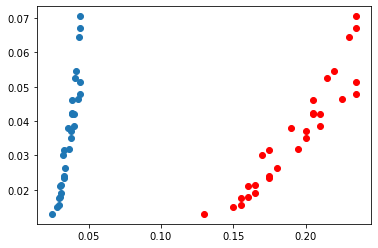

In [207]:
plt.scatter(np.asarray(_A*_X[_range]).reshape(-1), _y[_range])
plt.scatter(_X[_range], _y[_range], color = 'red')

array([0.13 , 0.15 , 0.155, 0.155, 0.16 , 0.16 , 0.165, 0.165, 0.17 ,
       0.175, 0.175, 0.175, 0.18 , 0.19 , 0.195, 0.2  , 0.2  , 0.205,
       0.205, 0.205, 0.21 , 0.21 , 0.215, 0.22 , 0.225, 0.23 , 0.235,
       0.235, 0.235, 0.235])

In [174]:
_X_mat

matrix([[0.13 , 0.15 , 0.155, 0.155, 0.16 , 0.16 , 0.165, 0.165, 0.17 ,
         0.175, 0.175, 0.175, 0.18 , 0.19 , 0.195, 0.2  , 0.2  , 0.205,
         0.205, 0.205, 0.21 , 0.21 , 0.215, 0.22 , 0.225, 0.23 , 0.235,
         0.235, 0.235, 0.235]])

In [161]:
np.dot(_y_mat, _weight) * _X_mat.T

ValueError: shapes (1,1) and (30,1) not aligned: 1 (dim 1) != 30 (dim 0)

In [158]:
_y_mat * np.reshape(_weight, (-1,1))

matrix([[0.43169719]])

In [157]:
np.reshape(_weight, (-1,1))

array([[0.39804347],
       [0.39866465],
       [0.39876458],
       [0.39876458],
       [0.39884231],
       [0.39884231],
       [0.39889785],
       [0.39889785],
       [0.39893117],
       [0.39894228],
       [0.39894228],
       [0.39894228],
       [0.39893117],
       [0.39884231],
       [0.39876458],
       [0.39866465],
       [0.39866465],
       [0.39854256],
       [0.39854256],
       [0.39854256],
       [0.39839832],
       [0.39839832],
       [0.39823194],
       [0.39804347],
       [0.39783294],
       [0.39760037],
       [0.3973458 ],
       [0.3973458 ],
       [0.3973458 ],
       [0.3973458 ]])

In [38]:
# horizontal stacking
X = np.hstack((one.T, mcolA.T))
X

matrix([[1.   , 0.455],
        [1.   , 0.35 ],
        [1.   , 0.53 ],
        ...,
        [1.   , 0.59 ],
        [1.   , 0.59 ],
        [1.   , 0.595]])

In [39]:
from tqdm import tqdm

In [42]:
def kernel(point, xmat, k):
    m, n = np.shape(xmat)
    weights = np.mat(np.eye((m)))
    
    for j in range(m):
        diff = point - X[j]
        weights[j, j] = np.exp(diff * diff.T / (-2.0 * k**2))
        
    return weights


def localWeight(point, xmat, ymat, k):
    weight = kernel(point, xmat, k)
    
    W = (X.T * (weight*X)).I * (X.T * weight * ymat.T)
    return W


def localWeightRegression(xmat, ymat, k):
    m,n = np.shape(xmat)
    y_hat = np.zeros(m)
    
    for i in tqdm(range(m)):
        y_hat[i] = xmat[i] * localWeight(xmat[i], xmat, ymat, k)
        
    return y_hat
    
    
    

y_hat = localWeightRegression(X, mcolB, 0.2)

100%|██████████| 1000/1000 [01:08<00:00, 14.56it/s]


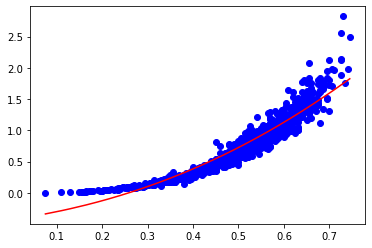

In [43]:
Xsort = X.copy()
Xsort.sort(axis=0)
plt.scatter(colA, colB, color = 'blue')
plt.plot(Xsort[:, 1], y_hat[X[:, 1].argsort(0)], color = 'red')

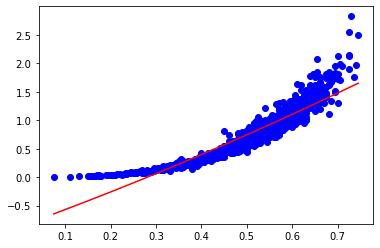

In [41]:
Xsort = X.copy()
Xsort.sort(axis=0)
plt.scatter(colA, colB, color = 'blue')
plt.plot(Xsort[:, 1], y_hat[X[:, 1].argsort(0)], color = 'red')

In [20]:
y_hat

array([0.45341464, 0.36001175, 0.49879805, ..., 0.60924112, 0.59390492,
       0.71474998])

In [28]:
def kernel(point, xmat, k):
    m, n = np.shape(xmat)
    weights = np.mat(np.eye((m)))
    
    for j in range(m):
        diff = point - X[j]
        weights[j, j] = np.exp(diff * diff.T / (-2.0 * k**2))
        
    return weights

In [29]:
np.mat(np.eye((1000)))

matrix([[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.]])

In [31]:
X[0]

matrix([[1.   , 0.455]])

In [208]:
kernel(_X[12])

TypeError: kernel() missing 2 required positional arguments: 'xmat' and 'k'

In [209]:
_X[12]

0.175

In [211]:
_stacked[12]

matrix([[1.  , 0.18]])

In [212]:
_stacked[11]

matrix([[1.   , 0.175]])